# Imports

In [253]:
from matplotlib import pyplot as plt
import pandas as pd

# Buscando dados em CSVs

In [254]:
df_b = pd.read_csv("../Test/Results/BSort.csv")
summary_b = pd.read_csv("../Test/Results/BSortSummary.csv")

df_q = pd.read_csv("../Test/Results/QSort.csv")
summary_q = pd.read_csv("../Test/Results/QSortSummary.csv")

Vamos observar as seguintes colunas:
- allThreads: Número de Threads ativas em todos os grupos, como nosso teste foi feito com apenas um grupo esse número representa a quantidade total de threads ativas..
- Latency: Tempo até o primeiro bit da resposta ser recebido.

# Analisando sumário

Average, Min, Max, Std.Dev são em relação aos milisegundos decorridos durante a chamada.

In [255]:
summary_b

,Label,# Samples,Average,Min,Max,Std. Dev.,Error %,Throughput,Received KB/sec,Sent KB/sec,Avg. Bytes
0,Asking for array to be sorted,1650,144153,530,468967,81301.59,0.000%,3.47071,200.41,234.11,59128.0
1,TOTAL,1650,144153,530,468967,81301.59,0.000%,3.47071,200.41,234.11,59128.0


In [256]:
summary_q

,Label,# Samples,Average,Min,Max,Std. Dev.,Error %,Throughput,Received KB/sec,Sent KB/sec,Avg. Bytes
0,Asking for array to be sorted,1650,1676,349,4368,1149.66,0.000%,129.33062,7467.83,8723.63,59128.0
1,TOTAL,1650,1676,349,4368,1149.66,0.000%,129.33062,7467.83,8723.63,59128.0


Podemos ver que a média da latência com o QuickSort é de 1,6s. Enquanto do BubbleSort é 144,1s.

In [257]:
df_b.describe()

,timeStamp,elapsed,responseCode,failureMessage,bytes,sentBytes,grpThreads,allThreads,Latency,IdleTime,Connect
count,1.650000e+03,1650.000000,1650.0,0.0,1650.0,1650.0,1650.000000,1650.000000,1650.000000,1650.0,1650.000000
mean,1.683218e+12,144153.357576,200.0,NaN,59128.0,69072.0,804.410909,804.410909,141727.367879,0.0,16594.703030
std,2.286000e+03,81326.238370,0.0,NaN,0.0,0.0,470.775584,470.775584,83679.406018,0.0,28039.141223
min,1.683218e+12,530.000000,200.0,NaN,59128.0,69072.0,1.000000,1.000000,416.000000,0.0,55.000000
25%,1.683218e+12,92285.000000,200.0,NaN,59128.0,69072.0,394.250000,394.250000,69538.250000,0.0,56.000000
50%,1.683218e+12,139235.000000,200.0,NaN,59128.0,69072.0,799.500000,799.500000,139119.500000,0.0,58.000000
75%,1.683218e+12,214419.250000,200.0,NaN,59128.0,69072.0,1213.000000,1213.000000,214261.500000,0.0,63857.750000
max,1.683218e+12,468967.000000,200.0,NaN,59128.0,69072.0,1624.000000,1624.000000,468843.000000,0.0,64366.000000


In [258]:
df_q.describe()

,timeStamp,elapsed,responseCode,failureMessage,bytes,sentBytes,grpThreads,allThreads,Latency,IdleTime,Connect
count,1.650000e+03,1650.000000,1650.0,0.0,1650.0,1650.0,1650.000000,1650.000000,1650.000000,1650.0,1650.000000
mean,1.683218e+12,1676.758182,200.0,NaN,59128.0,69071.0,250.049697,250.049697,1547.796364,0.0,71.689697
std,2.268368e+03,1150.008791,0.0,NaN,0.0,0.0,188.018343,188.018343,1148.660130,0.0,57.663960
min,1.683218e+12,349.000000,200.0,NaN,59128.0,69071.0,1.000000,1.000000,235.000000,0.0,55.000000
25%,1.683218e+12,543.250000,200.0,NaN,59128.0,69071.0,80.000000,80.000000,416.250000,0.0,61.000000
50%,1.683218e+12,1386.500000,200.0,NaN,59128.0,69071.0,199.000000,199.000000,1251.500000,0.0,66.000000
75%,1.683218e+12,2738.750000,200.0,NaN,59128.0,69071.0,411.750000,411.750000,2614.500000,0.0,74.000000
max,1.683218e+12,4368.000000,200.0,NaN,59128.0,69071.0,619.000000,619.000000,4246.000000,0.0,1102.000000


Nesses describes dos nossos DataFrames podemos perceber que o BubbleSort mantêm em média 804 requisições em espera simultaneamente, o QuickSort, por resolver suas requisições mais rapidamente, mantêm em média 250 requesições ativas simultaneamente.

# Gráficos

Algumas funções para auxiliar nos plots.

In [259]:
def req_index_latency(df, color = "purple"):
    plot(range(0, df.shape[0]), df['Latency'], 'Request index', 'Latency', color)

def req_index_elapsed(df, color = "purple"):
    plot(range(0, df.shape[0]), df['elapsed'], 'Request index', 'Elapsed time', color)

def plot(x, y, xlabel, ylabel, color = "blue"):
    plt.plot(x, y, color = color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

## Latência em função da ordem das requisições

Index maiores representam chamadas realizadas mais tarde na execução do teste.  
Index 0 = Primeira chamada  
Index 1 = Segunda chamada

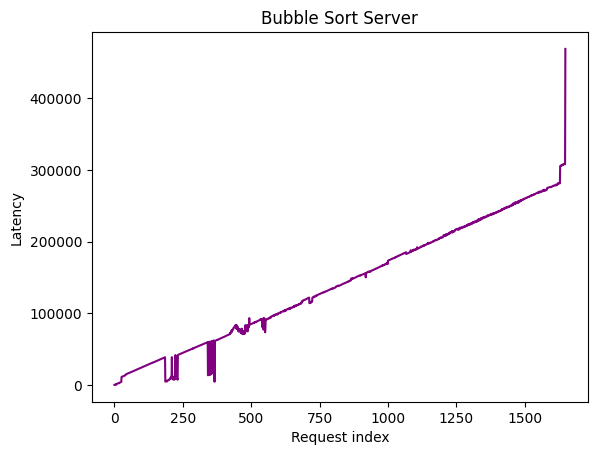

In [260]:
req_index_latency(df_b)
plt.title("Bubble Sort Server")
plt.savefig("B_ReqIndexVSLatency.png")

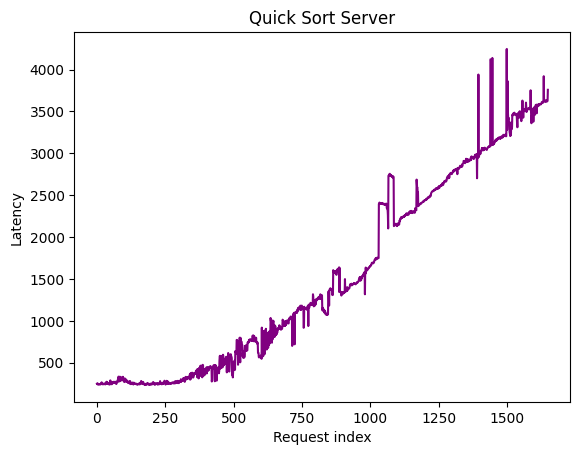

In [261]:
req_index_latency(df_q)
plt.title("Quick Sort Server")
plt.savefig("Q_ReqIndexVSLatency.png")

## Comparação entre as duas versões do servidor

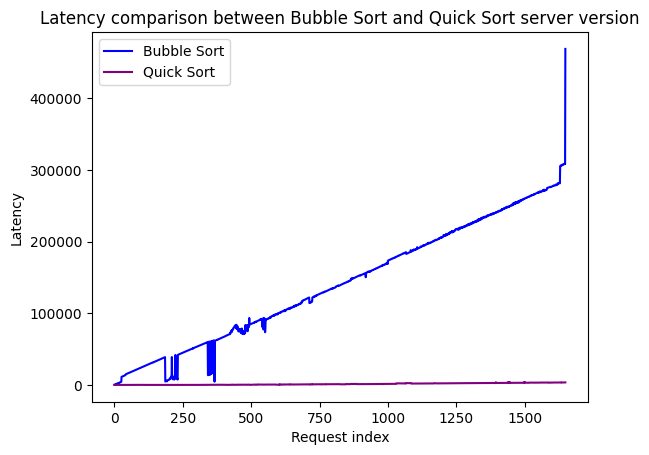

In [262]:
req_index_latency(df_b, "blue")
req_index_latency(df_q, "purple")
plt.title("Latency comparison between Bubble Sort and Quick Sort server version")
plt.legend(["Bubble Sort", "Quick Sort"])
plt.savefig("QB_Comparison_ReqIndexVSLatency.png")